<a href="https://colab.research.google.com/github/Isom99/cursodeGit/blob/master/predicciondePreciosNasdaq_PCA_2012_2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carga de los datos**

In [ ]:
#Importamos las librerías que necesitamos
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
#Conectamos colab con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bajamos lo archivos de datos
dset_base=pd.read_csv('/content/drive/My Drive/Nasdaq/Datos/Nasdaq_2012_2022.csv')
dset_predict=pd.read_csv('/content/drive/My Drive/Nasdaq/Datos/Nasdaq_062922_081822.csv')
#dset_predicciones=pd.read_csv('/content/drive/My Drive/Colab Notebooks/AnalisisEUESD/bd/EURUSDX_para_predicciones1.csv')

In [ ]:
#Seleccionamos las columnas con las que vamos a trabajar
#encabezado=['Open','High','Low','Close', 'Volume','Close_tom']
#ds_train=dset_base[encabezado]
dset_base

,Date,Open,High,Low,Close,Volume,Close_tom,Mov
0,7/2/2012,2938.409912,2951.229980,2925.709961,2951.229980,1845240000,2976.080078,1
1,7/3/2012,2950.810059,2976.080078,2948.399902,2976.080078,1009330000,2976.120117,1
2,7/5/2012,2970.370117,2987.939941,2958.300049,2976.120117,1423990000,2937.330078,1
3,7/6/2012,2955.199951,2957.500000,2921.370117,2937.330078,1437420000,2931.770020,0
4,7/9/2012,2934.489990,2942.989990,2919.040039,2931.770020,1455500000,2902.330078,0
...,...,...,...,...,...,...,...,...
2509,6/22/2022,10941.950200,11216.769530,10938.059570,11053.080080,5215100000,11232.190430,0
2510,6/23/2022,11137.679690,11260.269530,11046.280270,11232.190430,5238210000,11607.620120,1
2511,6/24/2022,11351.309570,11613.230470,11337.780270,11607.620120,9438810000,11524.549810,1
2512,6/27/2022,11661.019530,11677.490230,11487.070310,11524.549810,5017930000,11181.540040,0


In [ ]:
#Eliminamos la columna volumen
dt_features=dset_base.drop(dset_base.columns[[0,5,6,7]], axis='columns')
dt_features

,Open,High,Low,Close
0,2938.409912,2951.229980,2925.709961,2951.229980
1,2950.810059,2976.080078,2948.399902,2976.080078
2,2970.370117,2987.939941,2958.300049,2976.120117
3,2955.199951,2957.500000,2921.370117,2937.330078
4,2934.489990,2942.989990,2919.040039,2931.770020
...,...,...,...,...
2509,10941.950200,11216.769530,10938.059570,11053.080080
2510,11137.679690,11260.269530,11046.280270,11232.190430
2511,11351.309570,11613.230470,11337.780270,11607.620120
2512,11661.019530,11677.490230,11487.070310,11524.549810


In [ ]:
#Definimos la columna target
dt_target=dset_base['Close_tom']

In [ ]:
dt_target

0        2976.080078
1        2976.120117
2        2937.330078
3        2931.770020
4        2902.330078
            ...     
2509    11232.190430
2510    11607.620120
2511    11524.549810
2512    11181.540040
2513    11177.889650
Name: Close_tom, Length: 2514, dtype: float64

In [ ]:
#Normalizamos los datos
dt_features=StandardScaler().fit_transform(dt_features)


In [ ]:
dt_features

array([[-1.21142606, -1.21088626, -1.21261747, -1.20856216],
       [-1.20790385, -1.20388419, -1.2061065 , -1.20149922],
       [-1.20234789, -1.2005424 , -1.20326561, -1.20148784],
       ...,
       [ 1.17822681,  1.22982626,  1.20125953,  1.25177181],
       [ 1.26619878,  1.24793288,  1.2440989 ,  1.22816142],
       [ 1.23245996,  1.23619971,  1.15531803,  1.1306706 ]])

In [ ]:
#Verificamos la cantidad de datos con la que contamos
dt_features.shape

(2514, 4)

In [ ]:
#Verificamos los tipos de datos que conforman el dataframe
#ds_train.dtypes

##**Selección de los datos de entrenamiento**

**Definimos las variables de entrenamiento y prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

##**Vemos la información con la que vamos a entrenar**

In [ ]:
X_train

array([[ 0.60074657,  0.58622704,  0.60188722,  0.58883606],
       [-0.01208037, -0.02168284, -0.05452574, -0.05572478],
       [-0.57013478, -0.57438212, -0.56481313, -0.56653086],
       ...,
       [-0.4845431 , -0.49302034, -0.49265275, -0.50160896],
       [-0.26695504, -0.26974683, -0.2548856 , -0.26290534],
       [-0.58072688, -0.58379054, -0.58377507, -0.59123539]])

In [ ]:
y_train

1905    9298.929688
1461    7003.740234
764     5218.859863
900     4516.950195
930     4763.970215
           ...     
1638    6897.000000
1095    5193.490234
1130    5432.089844
1294    6271.330078
860     5037.529785
Name: Close_tom, Length: 1759, dtype: float64

In [ ]:
X_test

array([[-0.71682763, -0.72078544, -0.73434548, -0.7384793 ],
       [-0.7135525 , -0.71358332, -0.72988046, -0.72227867],
       [-0.67056221, -0.65696124, -0.66558273, -0.65054683],
       ...,
       [-0.83582305, -0.83808447, -0.83766334, -0.84284835],
       [ 0.22440522,  0.21092026,  0.19559486,  0.19216193],
       [-0.9740287 , -0.96666005, -0.96914564, -0.962213  ]])

In [ ]:
X_test.shape

(755, 4)

In [ ]:
y_test

617     4547.830078
927     4748.470215
942     4891.799805
973     4715.729980
1967    8914.709961
           ...     
1437    7345.290039
514     4456.020020
409     4267.549805
1575    7788.450195
313     3815.020020
Name: Close_tom, Length: 755, dtype: float64

In [ ]:
y_test.shape

(755,)

##**Creamos y entrenamos el modelo**

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(X_train)

PCA(n_components=2)

In [ ]:
ipca=IncrementalPCA(n_components=2, batch_size=10)

In [ ]:
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=2)

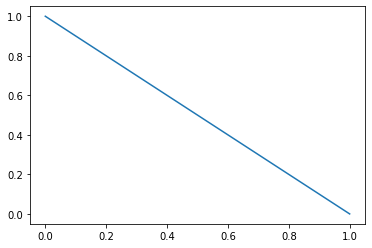

In [ ]:
grafico=plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)

In [ ]:
#Creamos el modelo
regressor=LinearRegression()

**Lo creamos para PCA**

In [ ]:
dt_train=pca.transform(X_train)
dt_test=pca.transform(X_test)

In [ ]:
regressor.fit(dt_train,y_train)

LinearRegression()

In [ ]:
#Calculamos el score
regressor.score(dt_train, y_train)

0.9990437644645861

In [ ]:
regressor.score(dt_test, y_test)

0.9988645223654125

In [ ]:
predict_ytest=regressor.predict(dt_test)

In [ ]:
predict_ytest

array([ 4605.59512775,  4651.88104581,  4909.00365226,  4778.90036565,
        8605.10615936,  5388.00359171,  7011.84901564,  3247.38003779,
       10681.91351117,  3794.07542464,  4911.17651269, 14451.03777591,
        4277.63545756,  4728.47432406,  7276.73338818,  5498.18620177,
        4486.4552105 ,  8594.33991314,  6962.98833468,  5313.27750577,
        7437.63427181,  4294.86393524,  4758.1553652 , 10944.98191188,
        4771.98102511, 11124.33293426,  6625.18664246, 13402.99524144,
        5055.62929141,  4126.33926965,  5879.82305285,  3179.39104015,
        7305.31905239,  7085.48372176,  4255.81015463,  5870.5703954 ,
        8116.81466003,  3072.55400026,  5201.70823653,  6311.9691128 ,
        7841.13420218, 11917.67232381,  7906.85879118,  4748.3890892 ,
        4810.95852881, 13651.29461224,  7082.05013962,  3065.50592879,
        5446.01891785,  5128.02508819,  4856.37238545, 14838.39294875,
        9960.81177755,  4838.36894614,  5063.97413953,  4717.744252  ,
      

In [ ]:
predict_ytest.shape

(755,)

In [ ]:
regressor.score(dt_test, predict_ytest)

1.0

In [ ]:
regressor.score(dt_test, y_test)

0.9988645223654125

Lo calculamos para ipc

In [ ]:
dt_train2=ipca.transform(X_train)
dt_test2=ipca.transform(X_test)

In [ ]:
regressor.fit(dt_train2,y_train)

LinearRegression()

In [ ]:
regressor.score(dt_train2, y_train)

0.9990291732988643

In [ ]:
regressor.score(dt_test2, y_test)

0.9988745591203032

In [ ]:
predict_ytest2=regressor.predict(dt_test2)

In [ ]:
predict_ytest2

In [ ]:
predict_ytest2.shape

(755,)

In [ ]:
regressor.score(dt_test2, predict_ytest2)

1.0

In [ ]:
regressor.score(dt_test2, y_test)

0.9988745591203032

In [ ]:
df_predicciones = pd.DataFrame({'PredPCA' : predict_ytest, 'PredIPCA' : predict_ytest2, 'YTest':y_test, 'Diferencia':predict_ytest2-y_test})
df_predicciones

,PredPCA,PredIPCA,YTest,Diferencia
617,4605.595128,4606.607712,4547.830078,58.777634
927,4651.881046,4650.006939,4748.470215,-98.463276
942,4909.003652,4903.714722,4891.799805,11.914917
973,4778.900366,4775.844489,4715.729980,60.114509
1967,8605.106159,8609.975273,8914.709961,-304.734688
...,...,...,...,...
1437,7376.589297,7378.667604,7345.290039,33.377565
514,4431.068679,4431.817524,4456.020020,-24.202496
409,4246.807375,4248.002682,4267.549805,-19.547123
1575,7870.787284,7873.156380,7788.450195,84.706185


**Quedo hasta acá** 06/9/2022 23:31

In [ ]:
#Entrenamos el modelo
regressor.fit(dt_train,y_train)

LinearRegression()

In [ ]:
regressor.score(X_train, y_train)

ValueError: ignored

In [ ]:
#Realizo la predicción con los datos de prueba
predict_ytest=regressor.predict(X_test)

In [ ]:
#Calculamos la presición del algoritmo con los datos de prueba
regressor.score(X_test,predict_ytest)

1.0

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,predict_ytest)

0.9988391728069951

In [ ]:
error=np.sqrt(mean_squared_error(y_test,predict_ytest))
error

117.8767608672016

**Quitar el volumen**

##**Realizamos Predicciones**

**Tomamos datos que no se encuentran en el dataset inicial** (Revisar acá)

In [ ]:
#Eliminamos la comumna Volume
dset_predict = dset_predict.drop(dset_predict.columns[[5]], axis='columns')


In [ ]:
dset_predict

In [ ]:
#Seleccionamos los valores de X que vamos a utilizar
X_predict=dset_predict.iloc[:,1:6 -1].values
y_predict=dset_predict.iloc[:, 5].values

In [ ]:
X_predict

array([[11160.21973, 11226.33008, 11072.19043, 11177.88965],
       [11048.25   , 11160.91992, 10850.00977, 11028.74023],
       [11006.83008, 11132.54981, 10922.70996, 11127.84961],
       [10964.17969, 11323.88965, 10911.4502 , 11322.24023],
       [11337.90039, 11443.15039, 11250.32031, 11361.84961],
       [11422.59961, 11644.46973, 11412.87988, 11621.34961],
       [11503.61035, 11689.7002 , 11479.76953, 11635.30957],
       [11524.49023, 11541.09961, 11348.05957, 11372.59961],
       [11420.88965, 11483.16992, 11207.08008, 11264.73047],
       [11056.54981, 11325.66992, 11031.26953, 11247.58008],
       [11151.20996, 11279.96973, 11005.92969, 11251.19043],
       [11379.36035, 11454.69043, 11295.33008, 11452.41992],
       [11561.63965, 11629.03027, 11322.83984, 11360.04981],
       [11515.     , 11721.21973, 11448.96973, 11713.15039],
       [11726.08984, 11939.95996, 11703.36035, 11897.65039],
       [11914.15039, 12060.58984, 11812.71973, 12059.61035],
       [12025.37012, 120

In [ ]:
y_predict

array([11028.74023, 11127.84961, 11322.24023, 11361.84961, 11621.34961,
       11635.30957, 11372.59961, 11264.73047, 11247.58008, 11251.19043,
       11452.41992, 11360.04981, 11713.15039, 11897.65039, 12059.61035,
       11834.11035, 11782.66992, 11562.57031, 12032.41992, 12162.58984,
       12390.69043, 12368.98047, 12348.75977, 12668.16016, 12720.58008,
       12657.54981, 12644.45996, 12493.92969, 12854.79981, 12779.91016,
       13047.19043, 13128.04981, 13102.54981, 12938.12012, 12965.33984,
       12705.21973])

In [ ]:
#Creamos y usamos el modelo para predecir
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
y_pred2 = regressor1.predict(X_predict)
y_pred2

array([11171.67577089, 11018.10090953, 11113.9330022 , 11332.63249641,
       11368.10114833, 11641.19194632, 11657.79573444, 11372.39848446,
       11271.49601305, 11282.57034356, 11226.50468481, 11434.18109702,
       11374.7276443 , 11710.7850227 , 11918.64851571, 12040.40880691,
       11839.84766233, 11767.37942021, 11558.38107436, 12058.63127159,
       12133.39300022, 12396.97930842, 12406.88913631, 12401.62216853,
       12693.25185009, 12707.5379859 , 12684.90191465, 12686.14534018,
       12487.21853972, 12833.42436762, 12804.04218961, 13046.16936574,
       13142.63839845, 13101.92563442, 12946.92503886, 12961.80194867])

**Calculamos el score**

In [ ]:
regressor1.score(X_predict, y_pred2)

1.0

**Calculamos el coeficiente de determinación R2**

In [ ]:
r2_score(y_pred2,regressor1.predict(X_predict)) 

1.0

**Calculamos el error estadístico**

In [ ]:
error=np.sqrt(mean_squared_error(y_predict,y_pred2))
error

187.54089220129714

**Creamos un dataframe para comparar las predicciones, con los valores reales**

In [ ]:
df_predicciones = pd.DataFrame({'Preal' : dset_predict['Close_tom'], 'Prediccion' : y_pred2, 'diferencia':dset_predict['Close_tom']-y_pred2})
df_predicciones

,Preal,Prediccion,diferencia
0,11028.74023,11171.675771,-142.935541
1,11127.84961,11018.100910,109.748700
2,11322.24023,11113.933002,208.307228
3,11361.84961,11332.632496,29.217114
4,11621.34961,11368.101148,253.248462
5,11635.30957,11641.191946,-5.882376
6,11372.59961,11657.795734,-285.196124
7,11264.73047,11372.398484,-107.668014
8,11247.58008,11271.496013,-23.915933
9,11251.19043,11282.570344,-31.379914


**Realizamos predicciones con datos nuevos**

In [ ]:
#Definimos las columnas que utilizaremos
ds_predicciones=dset_predicciones[encabezado]

In [ ]:
#Seleccionamos las columnas con las que vamos a trabajar
X_predicciones=ds_predicciones.iloc[:, :-1].values
X_predicciones

array([[1.040063, 1.039134, 1.043798, 1.040063]])

In [ ]:
#Realizamos las predicciones con los datos nuevos
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)
y_prediccion = regressor2.predict(X_predicciones)
y_prediccion

array([1.04246257])

In [ ]:
print(f'El precio de mañana será:{y_prediccion}' )

El precio de mañana será:[1.04246257]
